In [75]:
from glob import glob
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.ioff()

In [76]:
results = [json.load(open(f)) for f in glob("vary_conv_ranks_results/*.json")]
results = pd.DataFrame(results)
def get_epoch(x):
    return np.argmax(x) + 1
results.head()

results["best_loss"] = results["loss"].map(np.min)
results["best_loss_epoch"] = results["loss"].map(get_epoch)
results["best_categorical_accuracy"] = results["categorical_accuracy"].map(np.max)
results["best_categorical_accuracy_epoch"] = results["categorical_accuracy"].map(get_epoch)
results["best_val_loss"] = results["val_loss"].map(np.min)
results["best_val_loss_epoch"] = results["val_loss"].map(get_epoch)
results["best_val_categorical_accuracy"] = results["val_categorical_accuracy"].map(np.max)
results["best_val_categorical_accuracy_epoch"] = results["val_categorical_accuracy"].map(get_epoch)
#results["initial_rank"].replace(-1, 256, inplace=True)
#results["new_rank"].replace(-1, 256, inplace=True)
results.head()

,initial_ranks,new_ranks,rank_update_epoch,total_epochs,loss,categorical_accuracy,val_loss,val_categorical_accuracy,pre_update_loss,pre_update_categorical_accuracy,...,post_update_val_loss,post_update_val_categorical_accuracy,best_loss,best_loss_epoch,best_categorical_accuracy,best_categorical_accuracy_epoch,best_val_loss,best_val_loss_epoch,best_val_categorical_accuracy,best_val_categorical_accuracy_epoch
0,"[-1, -1, -1, -1, -1]","[3, -1, 128, 64, 10]",1,50,"[1.6076215505599976, 1.2506972551345825, 1.073...","[0.4189000129699707, 0.5562000274658203, 0.623...","[1.3902322053909302, 1.1757560968399048, 1.034...","[0.5037999749183655, 0.588699996471405, 0.6399...",1.384370,0.50994,...,1.390245,0.5039,0.000573,1,1.00000,45,0.716932,46,0.7797,46
1,"[-1, -1, -1, -1, -1]","[3, 32, 32, -1, 10]",1,50,"[1.5790601968765259, 1.2379112243652344, 1.076...","[0.4254800081253052, 0.5584200024604797, 0.622...","[1.3366010189056396, 1.1292033195495605, 1.048...","[0.5159000158309937, 0.6032000184059143, 0.629...",1.329500,0.52240,...,1.336627,0.5159,0.000677,1,1.00000,50,0.730815,48,0.7786,49
2,"[-1, -1, -1, -1, -1]","[18, 64, 64, -1, 10]",1,50,"[1.594486117362976, 1.253777265548706, 1.09180...","[0.42173999547958374, 0.5565999746322632, 0.61...","[1.4227005243301392, 1.1561025381088257, 1.058...","[0.5016000270843506, 0.5910999774932861, 0.629...",1.420159,0.50328,...,1.422685,0.5015,0.007410,1,0.99864,47,0.732574,38,0.7773,47
3,"[-1, -1, -1, -1, -1]","[9, 16, 32, 128, 10]",1,50,"[1.6027567386627197, 1.249598503112793, 1.0885...","[0.4194599986076355, 0.5546200275421143, 0.617...","[1.4645047187805176, 1.1761133670806885, 1.104...","[0.47099998593330383, 0.5906000137329102, 0.61...",1.458415,0.47666,...,1.464516,0.4711,0.012903,1,0.99704,41,0.732558,46,0.7643,16
4,"[-1, -1, -1, -1, -1]","[3, 16, 64, 128, 10]",1,50,"[1.5971856117248535, 1.2454440593719482, 1.085...","[0.4215799868106842, 0.5548400282859802, 0.615...","[1.3294609785079956, 1.1817272901535034, 1.021...","[0.5239999890327454, 0.5819000005722046, 0.638...",1.324062,0.52718,...,1.329474,0.5238,0.007786,1,0.99854,45,0.732441,45,0.7705,47


In [77]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   initial_ranks                         256 non-null    object 
 1   new_ranks                             256 non-null    object 
 2   rank_update_epoch                     256 non-null    int64  
 3   total_epochs                          256 non-null    int64  
 4   loss                                  256 non-null    object 
 5   categorical_accuracy                  256 non-null    object 
 6   val_loss                              256 non-null    object 
 7   val_categorical_accuracy              256 non-null    object 
 8   pre_update_loss                       256 non-null    float64
 9   pre_update_categorical_accuracy       256 non-null    float64
 10  pre_update_val_loss                   256 non-null    float64
 11  pre_update_val_cate

In [4]:
print("Best Val Accuracy", np.max(results["best_val_categorical_accuracy"]))
print(results.iloc[np.argmax(results["best_val_categorical_accuracy"])])

Best Val Accuracy 0.7904999852180481
initial_ranks                                                        [-1, -1, -1, -1, -1]
new_ranks                                                           [-1, 64, 32, 256, 10]
rank_update_epoch                                                                       1
total_epochs                                                                           50
loss                                    [1.5980926752090454, 1.241528868675232, 1.0764...
categorical_accuracy                    [0.42103999853134155, 0.5577600002288818, 0.61...
val_loss                                [1.347239375114441, 1.1516296863555908, 1.0602...
val_categorical_accuracy                [0.5113999843597412, 0.5860999822616577, 0.624...
pre_update_loss                                                                   1.34105
pre_update_categorical_accuracy                                                   0.51822
pre_update_val_loss                                            

In [5]:
print("Worst Val Accuracy", np.min(results["best_val_categorical_accuracy"]))
print(results.iloc[np.argmin(results["best_val_categorical_accuracy"])])

Worst Val Accuracy 0.7642999887466431
initial_ranks                                                        [-1, -1, -1, -1, -1]
new_ranks                                                            [9, 16, 32, 128, 10]
rank_update_epoch                                                                       1
total_epochs                                                                           50
loss                                    [1.6027567386627197, 1.249598503112793, 1.0885...
categorical_accuracy                    [0.4194599986076355, 0.5546200275421143, 0.617...
val_loss                                [1.4645047187805176, 1.1761133670806885, 1.104...
val_categorical_accuracy                [0.47099998593330383, 0.5906000137329102, 0.61...
pre_update_loss                                                                  1.458415
pre_update_categorical_accuracy                                                   0.47666
pre_update_val_loss                                           

<IPython.core.display.Javascript object>


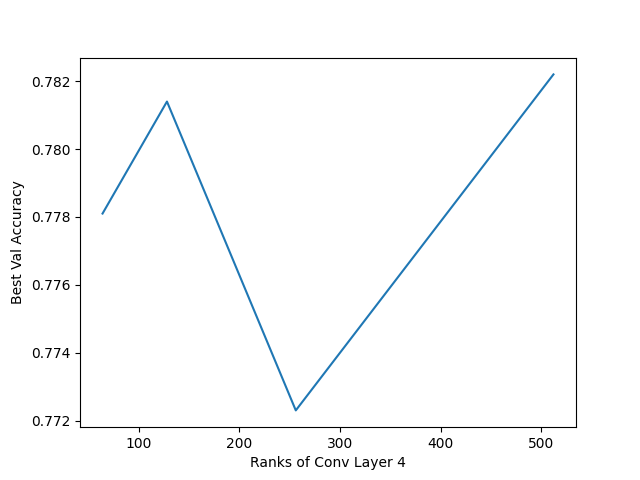

In [74]:
max_ranks = [27, 128, 256, 512]
def rank_vs_acc(ranks: dict):
    keys = list(ranks.keys())
    missing_key = list(set(range(4)) - set(keys))[0]
    df = results[(results["new_ranks"].str[keys[0]] == ranks[keys[0]]) & 
                  (results["new_ranks"].str[keys[1]] == ranks[keys[1]]) &
                  (results["new_ranks"].str[keys[2]] == ranks[keys[2]])]
    x = [x if x != -1 else max_ranks[missing_key] for x in list(df["new_ranks"].str[missing_key])]
    y = list(df["best_val_categorical_accuracy"])
    sorted_x_y = sorted(zip(x, y))
    x = [x for (x, _) in sorted_x_y]
    y = [y for (_, y) in sorted_x_y]
    plt.xlabel("Ranks of Conv Layer " + str(missing_key + 1))
    plt.ylabel("Best Val Accuracy")
    plt.plot(x, y)
    plt.show()

rank_vs_acc({0: 9, 1: 32, 2: -1})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>